In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
X_train = np.load('Data/X_train.npy', allow_pickle= True)
y_train = np.load('Data/Y_train.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

651 651 280 280


# Support Vector Classifier

Best parameters set found on development set:
 {'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}

 Best Score 0.7041219033536757

 Grid scores on development set:
0.644 (+/-0.024) for {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
0.392 (+/-0.004) for {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'sigmoid'}
0.668 (+/-0.012) for {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
0.440 (+/-0.017) for {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.392 (+/-0.004) for {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.392 (+/-0.004) for {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}
0.392 (+/-0.004) for {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.392 (+/-0.004) for {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.392 (+/-0.004) for {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}
0.392 (+/-0.004) for {'C': 0.1, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.392 (+/-0.004) for {'C': 0.1, 'degree': 1, 'gamma': 0.001

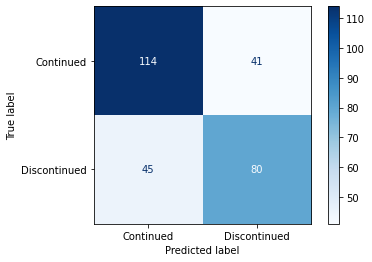

In [3]:
from sklearn.svm import SVC #import the SVC classifier

tuned_parameters = [{
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'sigmoid', 'poly'],
    'degree': [i for i in range(1,11,1)]
    }]

clf = GridSearchCV(SVC(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

# With SMOTE Oversampling

In [4]:
X_train = np.load('Data/X_train_smote.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_smote.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

718 718 280 280


Best parameters set found on development set:
 {'C': 1000, 'degree': 5, 'gamma': 0.1, 'kernel': 'poly'}

 Best Score 0.705630879657742

 Grid scores on development set:
0.665 (+/-0.016) for {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
0.384 (+/-0.034) for {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'sigmoid'}
0.654 (+/-0.023) for {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
0.653 (+/-0.034) for {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.572 (+/-0.051) for {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.633 (+/-0.031) for {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}
0.514 (+/-0.153) for {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.510 (+/-0.149) for {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.513 (+/-0.152) for {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}
0.513 (+/-0.152) for {'C': 0.1, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.513 (+/-0.152) for {'C': 0.1, 'degree': 1, 'gamma': 0.0

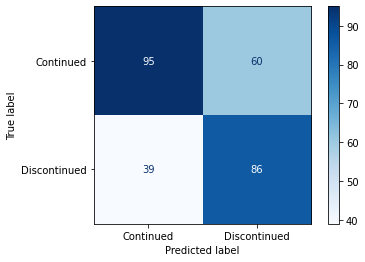

In [5]:
from sklearn.svm import SVC #import the SVC classifier

tuned_parameters = [{
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'sigmoid', 'poly'],
    'degree': [i for i in range(1,11,1)]
    }]

clf = GridSearchCV(SVC(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

# With Borderline-SMOTE Oversampling

In [6]:
X_train = np.load('Data/X_train_borderline_smote.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_borderline_smote.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

718 718 280 280


Best parameters set found on development set:
 {'C': 1000, 'degree': 5, 'gamma': 0.1, 'kernel': 'poly'}

 Best Score 0.706907396520016

 Grid scores on development set:
0.655 (+/-0.028) for {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
0.357 (+/-0.035) for {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'sigmoid'}
0.643 (+/-0.028) for {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
0.638 (+/-0.024) for {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.571 (+/-0.088) for {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.640 (+/-0.041) for {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}
0.521 (+/-0.159) for {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.519 (+/-0.158) for {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.519 (+/-0.158) for {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}
0.519 (+/-0.158) for {'C': 0.1, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.519 (+/-0.158) for {'C': 0.1, 'degree': 1, 'gamma': 0.0

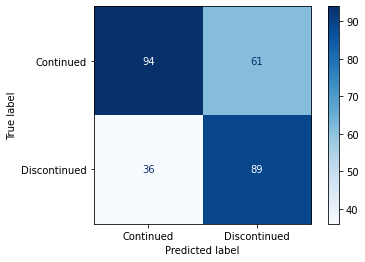

In [7]:
from sklearn.svm import SVC #import the SVC classifier

tuned_parameters = [{
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'sigmoid', 'poly'],
    'degree': [i for i in range(1,11,1)]
    }]

clf = GridSearchCV(SVC(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

# With ADASYN Oversampling

In [8]:
X_train = np.load('Data/X_train_adasyn.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_adasyn.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

FileNotFoundError: [Errno 2] No such file or directory: 'Data/X_train_adasyn.npy'

In [ ]:
from sklearn.svm import SVC #import the SVC classifier

tuned_parameters = [{
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'sigmoid', 'poly'],
    'degree': [i for i in range(1,11,1)]
    }]

clf = GridSearchCV(SVC(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

# Unused

In [ ]:
# import matplotlib.pyplot as plt


# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import precision_recall_fscore_support
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve

# import seaborn as sns


# from sklearn import svm, datasets
# from sklearn.metrics import auc
# from sklearn.metrics import RocCurveDisplay
# from sklearn.model_selection import StratifiedKFold, KFold

# X = np.concatenate((X_train, X_test), axis=0)
# y = np.concatenate((y_train, y_test), axis=0)

# tprs = []
# aucs = []
# all_cm= []
# precision = []
# recall = []
# f_measure = []

# mean_fpr = np.linspace(0, 1, 100)

# fig, ax = plt.subplots()
# kf = KFold(n_splits=5, random_state=123, shuffle=True)
# i = 1
# for train_index, test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     conf_mat = confusion_matrix(y_test, y_pred)
#     all_cm.append(conf_mat)
    
#      #calc metrics
#     actual = y_test
#     predicted = y_pred
#     curr_macro_prec = precision_score(actual, predicted,average='weighted')
#     precision.append(curr_macro_prec)
    
#     curr_macro_rec = recall_score(actual, predicted,average='weighted')
#     recall.append(curr_macro_rec)
    
#     curr_macro_f1 = f1_score(actual, predicted,average='weighted')
#     f_measure.append(curr_macro_f1)
    
#     viz = RocCurveDisplay.from_estimator(
#         clf,
#         X[test_index],
#         y[test_index],
#         name="ROC fold {}".format(i),
#         alpha=0.3,
#         lw=1,
#         ax=ax,
#     )
#     interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
#     interp_tpr[0] = 0.0
#     tprs.append(interp_tpr)
#     aucs.append(viz.roc_auc)
#     i +=1

# ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

# mean_tpr = np.mean(tprs, axis=0)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# std_auc = np.std(aucs)
# ax.plot(
#     mean_fpr,
#     mean_tpr,
#     color="b",
#     label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
#     lw=2,
#     alpha=0.8,
# )

# std_tpr = np.std(tprs, axis=0)
# tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
# tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(
#     mean_fpr,
#     tprs_lower,
#     tprs_upper,
#     color="grey",
#     alpha=0.2,
#     label=r"$\pm$ 1 std. dev.",
# )

# ax.set(
#     xlim=[-0.05, 1.05],
#     ylim=[-0.05, 1.05],
#     title="Receiver operating characteristic example",
# )
# ax.legend(loc="lower right")
# plt.show()


# ## plot macro cm

# sum_all_cm=np.zeros((2,2)).astype('int64')
# for j in range(i-1):
#     sum_all_cm+=all_cm[j]
    
# #plot 
# figs=[]
# for i in range(2):
#     figs.append(plt.figure())


# print('mean prec ', np.mean(precision))
# print('STD PREC', np.std(precision))

# print('mean recall ', np.mean(recall))
# print('STD recall', np.std(precision))

# print('mean f1 ', np.mean(f_measure))
# print('STD f1', np.std(f_measure))


# print("sum of all confuion matrices\n",sum_all_cm)
# ax=figs[0].add_subplot()
# sns.heatmap(sum_all_cm, annot=True, ax = ax);

# avg_all_cm=np.divide(sum_all_cm,5).astype('int64')
# print("\naverage of all confuion matrices\n",avg_all_cm)
# ax=figs[1].add_subplot()
# sns.heatmap(avg_all_cm, annot=True, ax = ax);


# #Lets print confision matrix
# labels =['Continued','Discontinued']

# conf_mat= avg_all_cm/ avg_all_cm.astype(np.float).sum(axis=1,keepdims = True)
# conf_mat = (np.around(conf_mat,2))
# print(conf_mat)
# ax= plt.subplot()
# sns.heatmap(conf_mat, annot=True, ax = ax); #annot=True to annotate cells

# # labels, title and ticks
# ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
# ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(labels,rotation=45); ax.yaxis.set_ticklabels(labels,rotation=45);
